In [86]:
import pandas as pd
import matplotlib.pyplot as plt
'''
'''

'\n'

In [87]:
#Dans ce partie, on charge le dataframe et applique tous les adptations qui sont necessaires pour manipuler les donnes
df = pd.read_csv('data.csv')
df['gender'] = df['gender'].fillna('Inconnu')
df['country'] = df['country'].fillna('Inconnu')
df['tax'] = df['tax'].mode()[0]


''' le code 'df['tax'].mode()[0]' doit être entre df['tax'].fillna()
dans l'exemple ci-dessous'''
'''df['tax'] = df['tax'].fillna(df['tax'].mode()[0])''' # -> voici le code que nous devons utiliser vraiment pour remplier les
                                                        #valeurs NaN par celui le plus fréquent dans la colonne <-


df['price_paid'] = (
    df['price_paid']
    .str.replace('$','')
    .str.replace(',','')
    .astype(float)
)

In [88]:
data = (
    df
    .groupby('date')
    .size()
    .sort_index(ascending = False)
)

In [70]:
usa = df[df['country'] == 'United States']

In [71]:
usa

,id,date,first_name,last_name,email,gender,ip_address,country,price_paid,tax
2,3,03/17/2021,Erl,Kilminster,ekilminster2@etsy.com,Male,213.8.101.145,United States,3.73,20.0
3,4,03/19/2021,Grata,Brantl,gbrantl3@umn.edu,Female,5.140.237.101,United States,3.70,20.0
5,6,03/25/2021,Titos,Braybrooke,tbraybrooke5@umn.edu,Female,173.100.21.179,United States,5.82,20.0
11,12,03/16/2021,Bailie,Wyman,bwymanb@lulu.com,Male,222.60.138.222,United States,3.15,20.0
14,15,03/21/2021,Oralie,Maryon,omaryone@va.gov,Female,215.248.16.198,United States,4.53,20.0
...,...,...,...,...,...,...,...,...,...,...
986,987,03/05/2021,Dukey,Espinal,despinalre@accuweather.com,Male,30.61.204.231,United States,4.07,20.0
987,988,03/13/2021,Patrice,Barr,pbarrrf@google.de,Male,14.129.223.239,United States,6.20,20.0
988,989,03/07/2021,Yves,Botler,ybotlerrg@miitbeian.gov.cn,Female,148.191.87.121,United States,6.10,20.0
997,998,03/13/2021,Betty,Stickels,bstickelsrp@cloudflare.com,Male,199.80.60.87,United States,7.54,20.0


In [72]:
data_usa = (
    usa
    .groupby('date')
    .size()
    .sort_index(ascending = False)
)

In [73]:
data_usa

date
03/30/2021     7
03/29/2021    11
03/28/2021    13
03/27/2021    18
03/26/2021     9
03/25/2021    15
03/24/2021     8
03/23/2021     7
03/22/2021     8
03/21/2021    10
03/20/2021    19
03/19/2021    11
03/18/2021     9
03/17/2021    17
03/16/2021    17
03/15/2021     7
03/14/2021    15
03/13/2021     9
03/12/2021     7
03/11/2021     8
03/10/2021    12
03/09/2021     9
03/08/2021     7
03/07/2021    16
03/06/2021    12
03/05/2021    10
03/04/2021    10
03/03/2021     7
03/02/2021    15
03/01/2021    10
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '03/30/2021'),
  Text(1, 0, '03/29/2021'),
  Text(2, 0, '03/28/2021'),
  Text(3, 0, '03/27/2021'),
  Text(4, 0, '03/26/2021'),
  Text(5, 0, '03/25/2021'),
  Text(6, 0, '03/24/2021'),
  Text(7, 0, '03/23/2021'),
  Text(8, 0, '03/22/2021'),
  Text(9, 0, '03/21/2021'),
  Text(10, 0, '03/20/2021'),
  Text(11, 0, '03/19/2021'),
  Text(12, 0, '03/18/2021'),
  Text(13, 0, '03/17/2021'),
  Text(14, 0, '03/16/2021'),
  Text(15, 0, '03/15/2021'),
  Text(16, 0, '03/14/2021'),
  Text(17, 0, '03/13/2021'),
  Text(18, 0, '03/12/2021'),
  Text(19, 0, '03/11/2021'),
  Text(20, 0, '03/10/2021'),
  Text(21, 0, '03/09/2021'),
  Text(22, 0, '03/08/2021'),
  Text(23, 0, '03/07/2021'),
  Text(24, 0, '03/06/2021'),
  Text(25, 0, '03/05/2021'),
  Text(26, 0, '03/04/2021'),
  Text(27, 0, '03/03/2021'),
  Text(28, 0, '03/02/2021'),
  Text(29, 0, '03/01/2021')])

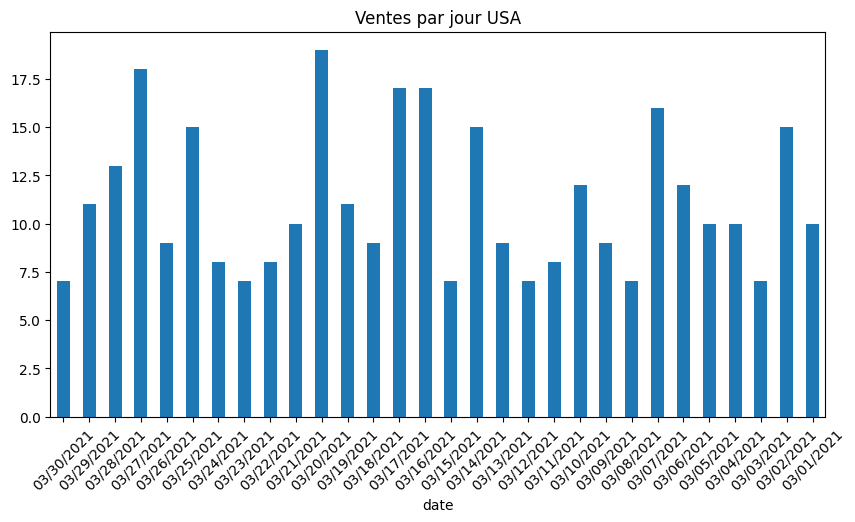

In [74]:
plt.figure(figsize = (10,5))
data_usa.plot(kind = 'bar')
plt.title('Ventes par jour USA')
plt.xticks(rotation = 45)

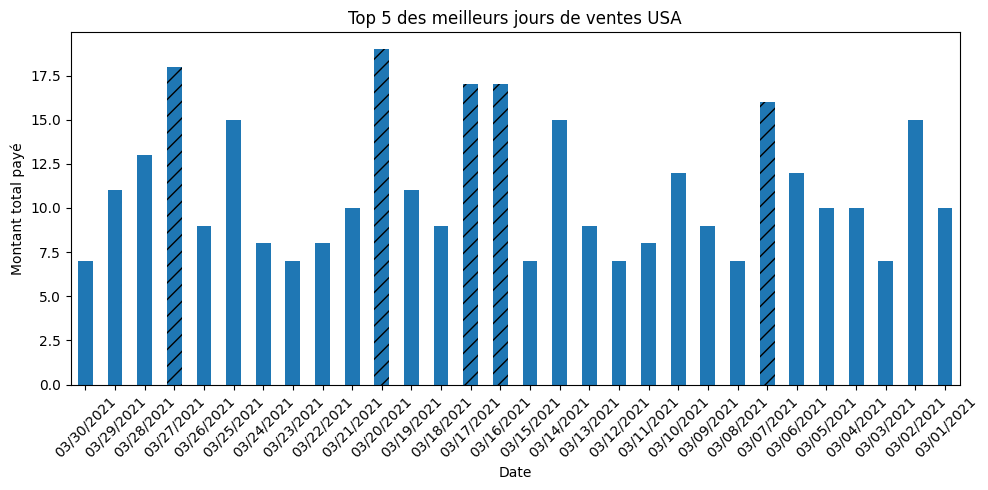

In [75]:
plt.figure(figsize=(10,5))
ax = data_usa.plot(kind='bar')

# récupérer les 5 plus grandes ventes
top5_values = data_usa.sort_values(ascending=False).head(5).values

# parcourir les barres et marquer celles du top 5
for bar in ax.patches:
    if bar.get_height() in top5_values:
        bar.set_hatch('//')

plt.title('Top 5 des meilleurs jours de ventes USA')
plt.xlabel('Date')
plt.ylabel('Montant total payé')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
d03_2021 = usa[usa['date'].isin(["03/08/2021","03/17/2021","03/18/2021","03/21/2021","03/28/2021"])]
d03_17 = usa[usa['date'] == "03/17/2021"]

In [77]:
d03 = (
    d03_2021
    .groupby('gender')
    .size()
    .sort_values(ascending = False)
)
d03

gender
Male       28
Female     25
Inconnu     3
dtype: int64

In [78]:
data_usa.sort_values(ascending=False).head(5).values

array([19, 18, 17, 17, 16])

<Axes: >

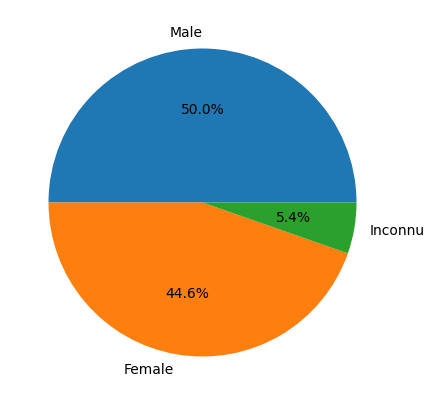

In [79]:
plt.figure(figsize = (10,5))
d03.plot(kind='pie', autopct = '%1.1f%%' )


In [80]:
d03_2021

,id,date,first_name,last_name,email,gender,ip_address,country,price_paid,tax
2,3,03/17/2021,Erl,Kilminster,ekilminster2@etsy.com,Male,213.8.101.145,United States,3.73,20.0
14,15,03/21/2021,Oralie,Maryon,omaryone@va.gov,Female,215.248.16.198,United States,4.53,20.0
40,41,03/17/2021,Em,Dupoy,edupoy14@foxnews.com,Male,59.105.241.85,United States,3.45,20.0
53,54,03/17/2021,Ange,Purvess,apurvess1h@ucsd.edu,Male,190.14.100.103,United States,6.57,20.0
61,62,03/17/2021,Mill,Haughan,mhaughan1p@ox.ac.uk,Female,75.242.73.109,United States,6.17,20.0
94,95,03/17/2021,Shannan,Giacomozzo,sgiacomozzo2m@psu.edu,Female,101.143.192.29,United States,5.80,20.0
101,102,03/18/2021,Fletch,Hambers,fhambers2t@trellian.com,Female,151.247.8.3,United States,4.42,20.0
115,116,03/18/2021,Michael,Domini,mdomini37@umich.edu,Male,227.58.80.112,United States,6.94,20.0
120,121,03/17/2021,Tasha,Monkhouse,tmonkhouse3c@chronoengine.com,Male,201.119.190.49,United States,8.97,20.0
125,126,03/28/2021,Kaleena,Lewry,klewry3h@mediafire.com,Male,255.143.66.218,United States,9.37,20.0


In [81]:
d03_price = (
    d03_2021
    .groupby('date')['price_paid']
    .sum()
)

In [82]:
d03_price

date
03/08/2021    41.63
03/17/2021    98.27
03/18/2021    48.05
03/21/2021    71.85
03/28/2021    76.63
Name: price_paid, dtype: float64

In [83]:
d03_17 = usa[usa['date'] == "03/17/2021"]

In [84]:
vlr03_17 = d03_17.groupby('gender')['price_paid'].sum()

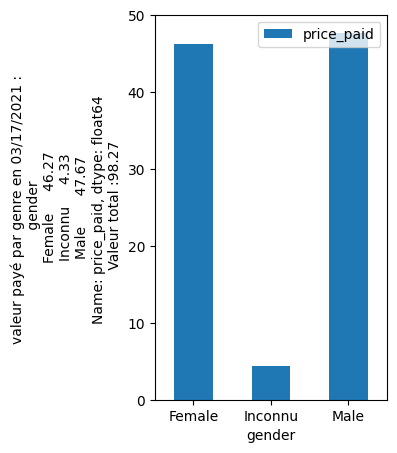

In [85]:
plt.figure(figsize = (3,5))
vlr03_17.plot(kind='bar')
plt.ylabel('')
plt.ylabel(f'valeur payé par genre en 03/17/2021 : \n {vlr03_17} \n Valeur total :{vlr03_17.sum()}')
plt.xticks(rotation = 0)
plt.legend(ncol=3)
